In [1]:
from pathlib import Path

import datetime
import sys
import scipy
import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

import matplotlib as mpl
mpl.rc('text', usetex=False)

#Code for using superscripts
def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)
#Checks to make sure you are in the right folder, if this is wrong reload
import os
print(os.getcwd())
plt.rcParams['font.family'] = 'Helvetica'

C:\Users\jdnor\Documents\PlottingNB


# Edit cells under headers marked with *
### -Run cells in order
### -File to be normalized; to make it easier keep this notebook in the same folder or parent folder as the .csv file
### -See the last comment in this cell. Check the original .csv until you can figure out which range covers the full list of rows that you want to normalize.
### -Curent steps for "measurement" are set to 2, but you can also modify as necessary depending on how your columns are distributed. As it is, this code reads a file with alternating wavelength and reflectance columns, but only returns the reflectance columns.
# *

In [2]:
# Choose .csv data file and turn it into dataframe
file = pd.read_csv('CuandNidata41521023.csv', header = [0])
df = pd.DataFrame(file)
# To see all columns and all rows - you can change None to 10 if you want to see less results; this includes settings info that shows up at the end
pd.set_option("display.max_rows", None, "display.max_columns", None)
# To return dataframe without settings at the end

# df.columns = df.iloc[0]
# df = df.iloc[1:].reset_index(drop=True)
df.head()

druvs_df = df.iloc[51:452] # where 601 is 1- the last row with DRUVS data in this particular file to account for the headers, which is also why it starts at 1
# for ease of plotting, create wavelength series and measurement dataframe
# in the original code in this cell, this wavelength series takes the first column in the original .csv file. Modify as needed, including renaming.
wavelength = druvs_df.iloc[:, 0]
measurements = druvs_df.iloc[:, 1:108:2]

#display(wavelength)
measurements.head()

,CuNi,Cu,Ni
51,15.77868271,10.06482887,15.23042583
52,15.81209946,10.07404041,15.22780609
53,15.68674564,9.985049248,15.17884445
54,15.70710564,9.967853546,15.17694473
55,15.61668968,9.872441292,15.07709503


In [3]:
# to check how many columns you have in total, remove the semi-colon.
measurements.count(axis='columns');

In [4]:
# to ensure that the columns aren't object types
print(measurements.dtypes)
measurements = measurements.astype(float)
print(measurements.dtypes)

CuNi    object
Cu      object
Ni      object
dtype: object
CuNi    float64
Cu      float64
Ni      float64
dtype: object


In [6]:
# once you've checked that the dataframe two cells above looks like the data that you want, continue

# apply normalization techniques
# Pandas automatically applies this column-wise
measurements_normalized = (measurements - measurements.min()) / (measurements.max() - measurements.min())
abs_measurements_normalized = 1-measurements_normalized
# view normalized data
measurements_normalized.head()
abs_measurements_normalized.head()

,CuNi,Cu,Ni
51,0.997386,0.998853,1.000000
52,1.000000,1.000000,0.999696
53,0.990196,0.988917,0.994023
54,0.991788,0.986776,0.993802
55,0.984716,0.974893,0.982231


In [7]:
wavelength_list = wavelength.tolist();

# *
### First chunk of code in this cell inserts the Wavelength column at the beginning of the dataframe. Modify as needed if the first column of your original file isn't for Wavelength. Stay consistent with the third cell in this notebook.
### See the second to last comment in this cell. You can change as many header titles as you want, just make sure that the exact old title is on the left of the colon and you new one is on the right.

In [8]:
table_for_plot = abs_measurements_normalized.assign(Wavelength = wavelength)
first_column = table_for_plot.pop('Wavelength')
table_for_plot.insert(0, 'Wavelength', first_column)
table_for_plot = table_for_plot.set_index('Wavelength')
#table_for_plot.columns.values[] = np.arange(len(table_for_plot.columns))

#column_list = list([1]);
#column_string_list = ([str(x) for x in column_list])
#table_for_plot.columns.values[range(5,55)] = column_string_list

# if any columns correspond to baselines/any other measurements besides the cycles, rename here. Remember that numbering starts at 0. Otherwise comment out this line.
#table_for_plot.rename(columns={"Unnamed: 1":"RTatm", "Unnamed: 3":"RTatm2","Unnamed: 5":"Ar300","Unnamed: 7":"Ar300_after2hrs"}, inplace=True)
# this will prompt you to enter a file name for the .xlsx file with the normalized data
#file_name = input('Enter the name for the normalized file, no spaces or "normalized": ')
#table_for_plot.to_excel("normalized_{}.xlsx".format(file_name), index=False)  


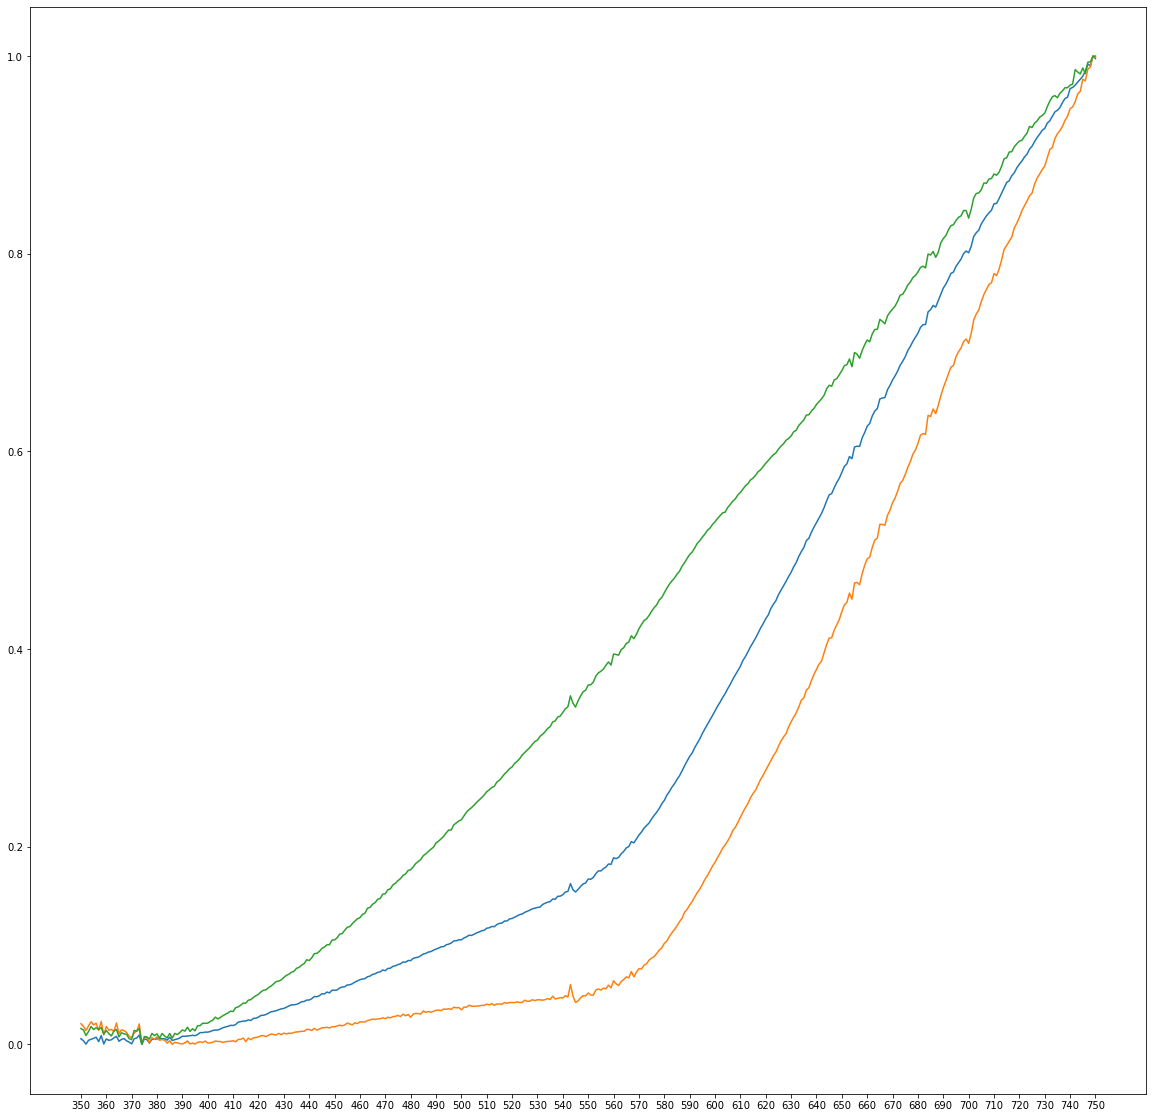

In [10]:
table_for_plot.head()

mpl.rcParams.update({'font.size':10 })
mpl.rcParams['pdf.fonttype'] = 42
fig,ax = plt.subplots(figsize = [20,20])
plt.plot(table_for_plot)

plt.gca().invert_xaxis()


# Axis labels
font_size = 8
#fig.set_title('Cu/SiO' + get_sub('2') + ' NP Sizes', fontsize = 10*font_size)

ax.set_xticks(ax.get_xticks()[::10])


# *
### -This cell just returns a rough preview of the plotted data. Modify as needed to get a different/higher quality plot.
### -"Wavelength" is set as the x-axis, you can change to another column name.
### -Labels can be modified.


AxesSubplot(0.0979398,0.121736;0.89706x0.870764)


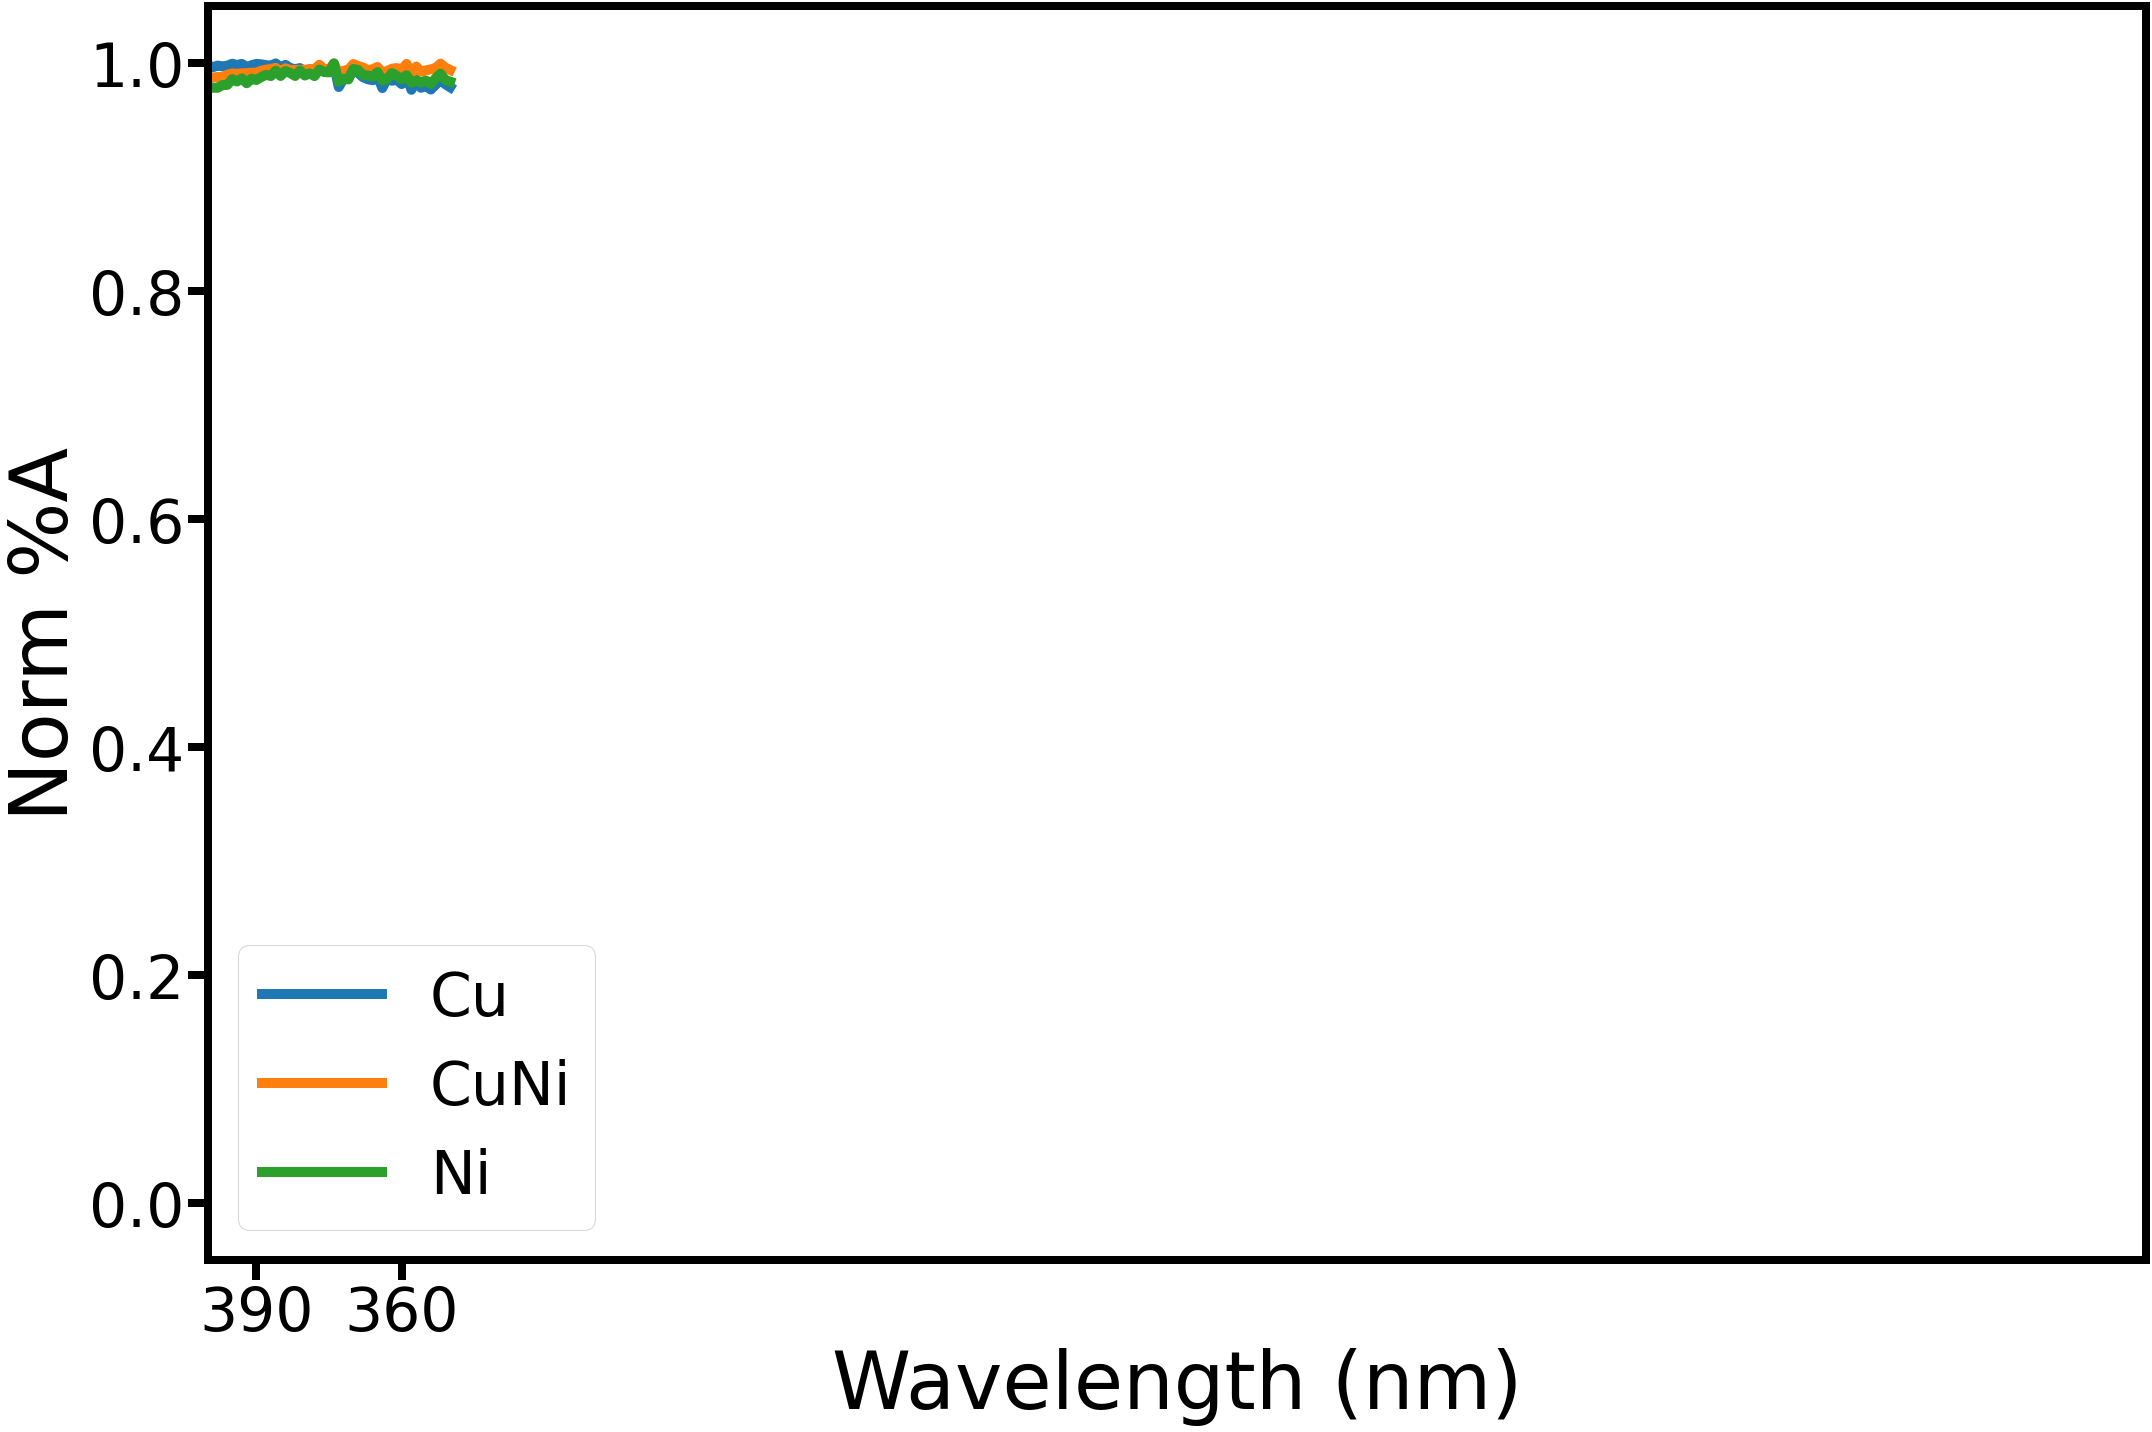

In [14]:

font_size = 10
mpl.rcParams.update({'font.size':10 })
mpl.rcParams['pdf.fonttype'] = 42
fig,ax = plt.subplots(figsize = [30,20])
plt.plot(table_for_plot["Cu"],label = "Cu",linewidth=font_size)
plt.plot(table_for_plot["CuNi"],label = "CuNi",linewidth=font_size)
plt.plot(table_for_plot["Ni"],label = "Ni",linewidth=font_size)
plt.gca().invert_xaxis()


# Axis labels

#fig.set_title('Cu/SiO' + get_sub('2') + ' NP Sizes', fontsize = 10*font_size)

ax.set_xticks(ax.get_xticks()[::30])
ax.set_xlim(350,750)
ax.set_xlabel("Wavelength (nm)", fontsize = 8*font_size)
ax.set_ylabel("Norm %A", fontsize = 8*font_size)

plt.legend()




for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth( font_size*0.8)
    ax.spines[axis].set_position(("axes", 0))
    
for axis in ['top','right']:
    ax.spines[axis].set_visible(True)
    ax.spines[axis].set_linewidth( font_size*0.8)

#Legend Control
ax.legend(fontsize = 6*font_size, loc = "lower left")
# And adjust length and tkickness of tick marks

ax.tick_params(axis='both', which='minor', labelsize=8)
ax.tick_params(length = 2*font_size, width = font_size*0.8,labelsize = 6*font_size) 

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


# ensure that plt.show() remains AFTER saveax or the image will not save properly.
plt.tight_layout()
print(ax)
fig_name = 'abs_CuNiUVVIS_230422'
plt.savefig(Path.cwd() / "normalized_{}.pdf".format(fig_name), bbox_inches="tight", dpi=100, format = "pdf")
plt.show()